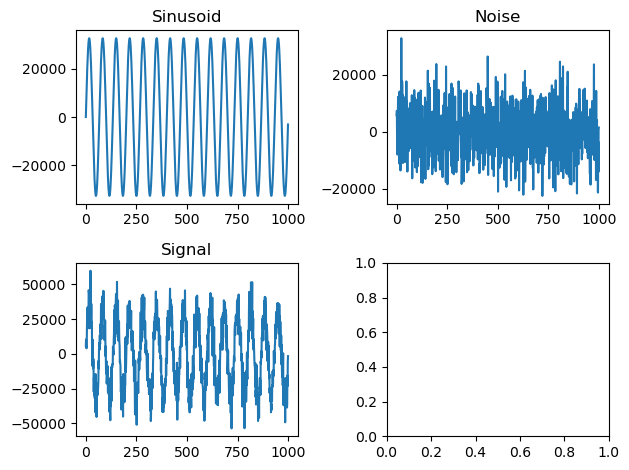

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

def genSine(a, f0, fs, dur):
    t = np.arange(dur)
    sinusoid = a*np.sin(2*np.pi*t*(f0/fs))
    sinusoid = normalise(sinusoid)
    return sinusoid


def genNoise(a, dur):
    noise = a*np.random.normal(0,1,dur)
    noise = normalise(noise)
    return noise


def normalise(x,MAX_INT16=32767):
    maxamp = max(x)
    amp = math.floor(MAX_INT16/maxamp)
    norm = np.zeros(len(x))
    for i in range(len(x)):
        norm[i] = amp*x[i]
    return norm

fs = 1000
dur = 1*fs
t = np.arange(dur)     
sinusoid = genSine(1,15,fs,dur)
noise = genNoise(5, dur)
signal = noise + sinusoid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(t, sinusoid)
ax1.set_title('Sinusoid')
ax2.plot(t, noise)
ax2.set_title('Noise')
ax3.plot(t, signal)
ax3.set_title('Signal')
plt.tight_layout()

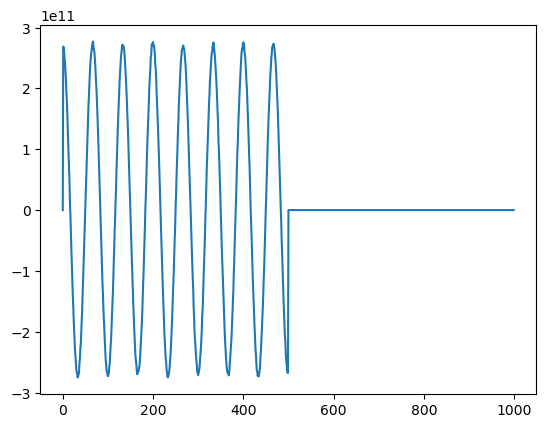

In [14]:
def autocorrelation(N, signal):
    ac = np.zeros(1000)
    for k in range(1, int(N/2)):
        sum = 0
        for n in range(1, int(N/2)):
            sum = sum + (signal[n]*signal[n+k])
        ac[k] = ac[k] + sum
    return ac

N = dur
signal_ac = autocorrelation(fs, signal)

plt.plot(t, signal_ac)